In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import load_model

### TRAINING PHASE

In [26]:
data = pd.read_csv('../../Data/full_data.csv',low_memory=False)
ann1_variables = [
    'strike',
    'stock',
    'tau',
    'sigma',
    'price',
    'call',
]

ann1_data = data[ann1_variables]

In [ ]:
ann1_call_data = ann1_data[ann1_data.call == 1]
ann1_put_data = ann1_data[ann1_data.call == 0]

ann1_call_data.drop('call', axis = 1, inplace = True)
ann1_put_data.drop('call', axis = 1, inplace = True)

In [28]:
X = ann1_call_data[['strike', 'stock', 'tau', 'sigma']]
y = ann1_call_data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

ANN1_call = Sequential()
ANN1_call.add(Dense(30,input_dim = 4, activation = 'sigmoid'))
ANN1_call.add(Dense(30, activation = 'sigmoid'))
ANN1_call.add(Dense(30, activation = 'sigmoid'))
ANN1_call.add(Dense(30, activation = 'sigmoid'))
ANN1_call.add(Dense(1))

ANN1_call.compile(loss = 'mean_squared_error',optimizer = 'Adam')
ANN1_call.fit(X_train,y_train,epochs = 100, batch_size = 32)


Epoch 1/100


c:\Users\Domenico\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


973/973 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2943.9375
Epoch 2/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 695.6537
Epoch 3/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 773.9314
Epoch 4/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 654.0002
Epoch 5/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - loss: 871.5722
Epoch 6/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 663.6382 
Epoch 7/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - loss: 675.9292
Epoch 8/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 769.3351
Epoch 9/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 673.4465
Epoch 10/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 660.7301
Epoch 11/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 738.5064
Epoch 12/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - loss: 708.3461
Epoch 13/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 663.6609
Epoch 14/100
973/973 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - loss: 640.3723
Epoch 15/100
973/

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


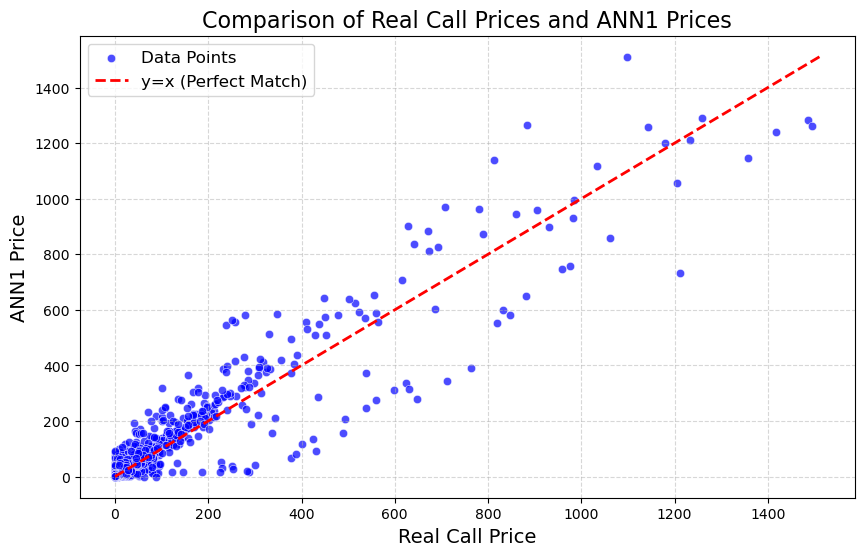

In [29]:
X = ann1_call_data[['strike', 'stock', 'tau', 'sigma']]
y = ann1_call_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

y_pred = ANN1_call.predict(X_test)

y_test = y_test.values.flatten()  
y_pred = y_pred.flatten() 

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7, label='Data Points')
plt.plot([y_test.min(), y_pred.max()], [y_test.min(), y_pred.max()],color='red', linestyle='--', linewidth=2, label='y=x (Perfect Match)')

plt.title('Comparison of Real Call Prices and ANN1 Prices', fontsize=16)
plt.xlabel('Real Call Price', fontsize=14)
plt.ylabel('ANN1 Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.savefig('scatter_comparison_call_ann1.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
X = ann1_put_data[['strike', 'stock', 'tau', 'sigma']]
y = ann1_put_data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

ANN1_put = Sequential()
ANN1_put.add(Dense(30,input_dim = 4, activation = 'sigmoid'))
ANN1_put.add(Dense(30, activation = 'sigmoid'))
ANN1_put.add(Dense(30, activation = 'sigmoid'))
ANN1_put.add(Dense(30, activation = 'sigmoid'))
ANN1_put.add(Dense(1))

ANN1_put.compile(loss = 'mean_squared_error',optimizer = 'Adam')
ANN1_put.fit(X_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100


c:\Users\Domenico\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 994us/step - loss: 849.9064
Epoch 2/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - loss: 286.7162
Epoch 3/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - loss: 290.2716
Epoch 4/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 278.3094
Epoch 5/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 272.9583
Epoch 6/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 282.1711
Epoch 7/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 228.0737
Epoch 8/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 298.2085
Epoch 9/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - loss: 332.4916
Epoch 10/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 314.0242  
Epoch 11/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 283.4626
Epoch 12/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 277.4827
Epoch 13/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 282.4213
Epoch 14/100
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 272.7601
Epoch 15/100
85

215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


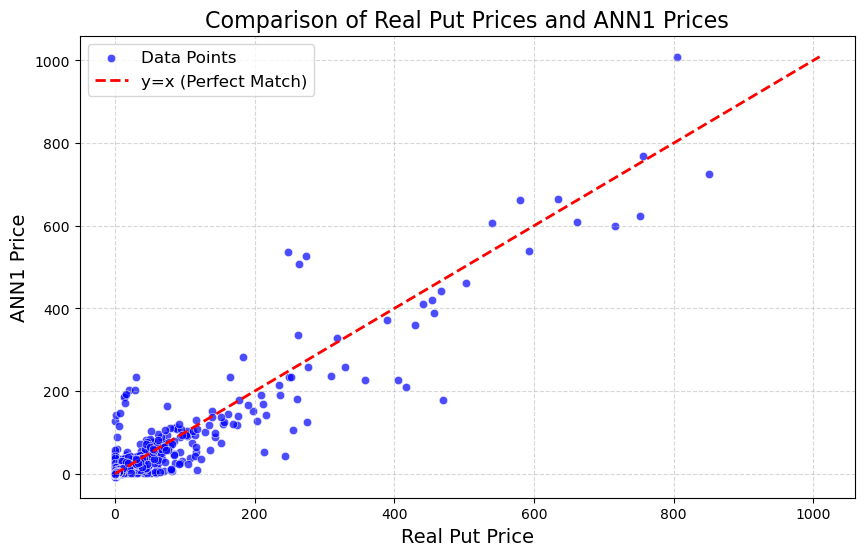

In [31]:
X = ann1_put_data[['strike', 'stock', 'tau', 'sigma']]
y = ann1_put_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

y_pred = ANN1_put.predict(X_test)

y_test = y_test.values.flatten()  
y_pred = y_pred.flatten() 

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7, label='Data Points')
plt.plot([y_test.min(), y_pred.max()], [y_test.min(), y_pred.max()],color='red', linestyle='--', linewidth=2, label='y=x (Perfect Match)')

plt.title('Comparison of Real Put Prices and ANN1 Prices', fontsize=16)
plt.xlabel('Real Put Price', fontsize=14)
plt.ylabel('ANN1 Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.savefig('scatter_comparison_put_ann1.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
ANN1_call.save('models\\ann1\ANN1_call.keras')
ANN1_put.save('models\\ann1\ANN1_put.keras')

#### PERFORMANCE FOR CALL MODEL

In [33]:
# Load the model
ANN1_call = load_model('models\\ann1\\ANN1_call.keras')

In [34]:
# Separate features and target
X = ann1_call_data[['strike', 'stock', 'tau', 'sigma']]
y = ann1_call_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [35]:
X_test['ann1'] = ANN1_call.predict(X_test)
X_test['price'] = y_test
X_test

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,strike,stock,tau,sigma,ann1,price
10271,307.5,321.06,0.003968,0.420430,28.373877,14.50
36007,90.0,64.41,0.023810,0.711829,0.508475,0.01
63829,5.0,10.56,0.083333,0.633917,4.685965,5.30
24995,185.0,108.06,0.146825,0.261064,0.076767,0.03
69910,10.0,7.16,0.142857,0.333159,0.136350,0.10
...,...,...,...,...,...,...
13355,1760.0,1000.68,0.007937,0.960084,-0.637115,0.04
35324,8.0,32.72,0.138889,0.791322,22.762594,27.30
39515,121.0,111.91,0.003968,0.513559,1.448642,1.75
17752,84.0,77.02,0.003968,0.254547,0.898919,0.19


In [36]:
# Calculate Mean Squared Error (MSE)
ANN1_call_mse = mean_squared_error(X_test['price'], X_test['ann1'])

# Calculate Root Mean Squared Error (RMSE)
ANN1_call_rmse = np.sqrt(ANN1_call_mse)

# Calculate Mean Absolute Error (MAE)
ANN1_call_mae = mean_absolute_error(X_test['price'], X_test['ann1'])

# Calculate Mean Absolute Percentage Error (MAPE)
ANN1_call_mape = np.mean(np.abs((X_test['price'] - X_test['ann1']) / X_test['price'])) * 100

# Calculate R-squared
ANN1_call_r_squared = r2_score(X_test['price'], X_test['ann1'])

print("Mean Squared Error (MSE):", ANN1_call_mse)
print("Root Mean Squared Error (RMSE):", ANN1_call_rmse)
print("Mean Absolute Error (MAE):", ANN1_call_mae)
print("Mean Absolute Percentage Error (MAPE):", ANN1_call_mape)
print("R-squared:", ANN1_call_r_squared)


Mean Squared Error (MSE): 724.1149153000831
Root Mean Squared Error (RMSE): 26.90938340616676
Mean Absolute Error (MAE): 6.319833532156038
Mean Absolute Percentage Error (MAPE): 1269.7831494409043
R-squared: 0.8891649509674061


#### PERFORMANCE FOR PUT MODEL

In [37]:
# Load the model
ANN1_put = load_model('models\\ann1\\ANN1_put.keras')

In [38]:
# Separate features and target
X = ann1_put_data[['strike', 'stock', 'tau', 'sigma']]
y = ann1_put_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [39]:
X_test['ann1'] = ANN1_put.predict(X_test)
X_test['price'] = y_test
X_test

215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step


,strike,stock,tau,sigma,ann1,price
49372,35.0,44.32,0.095238,0.410373,0.050380,0.15
765,138.0,147.68,0.003968,0.277048,0.809911,0.02
55721,40.0,61.72,0.452381,0.447565,-0.184793,0.57
29949,70.0,128.69,0.027778,0.630169,-0.086713,0.03
59768,20.0,15.91,0.250000,0.807918,6.038419,6.00
...,...,...,...,...,...,...
19362,140.0,141.38,0.087302,0.282565,3.194919,1.47
35822,67.5,78.00,0.079365,0.286145,0.253077,0.08
22724,180.0,182.55,0.071429,0.206939,3.613818,1.75
48638,67.5,67.65,0.079365,0.444620,1.731754,0.25


In [40]:
# Calculate Mean Squared Error (MSE)
ANN1_put_mse = mean_squared_error(X_test['price'], X_test['ann1'])

# Calculate Root Mean Squared Error (RMSE)
ANN1_put_rmse = np.sqrt(ANN1_put_mse)

# Calculate Mean Absolute Error (MAE)
ANN1_put_mae = mean_absolute_error(X_test['price'], X_test['ann1'])

# Calculate Mean Absolute Percentage Error (MAPE)
ANN1_put_mape = np.mean(np.abs((X_test['price'] - X_test['ann1']) / X_test['price'])) * 100

# Calculate R-squared
ANN1_put_r_squared = r2_score(X_test['price'], X_test['ann1'])

print("Mean Squared Error (MSE):", ANN1_put_mse)
print("Root Mean Squared Error (RMSE):", ANN1_put_rmse)
print("Mean Absolute Error (MAE):", ANN1_put_mae)
print("Mean Absolute Percentage Error (MAPE):", ANN1_put_mape)
print("R-squared:", ANN1_put_r_squared)

Mean Squared Error (MSE): 181.74698717771233
Root Mean Squared Error (RMSE): 13.48135702285613
Mean Absolute Error (MAE): 3.033121005774553
Mean Absolute Percentage Error (MAPE): 974.0646393060849
R-squared: 0.8676651219069951
